                            OLS Regression Results                            
Dep. Variable:                poverty   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     20.58
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           8.88e-10
Time:                        13:24:03   Log-Likelihood:                -103.39
No. Observations:                  51   AIC:                             216.8
Df Residuals:                      46   BIC:                             226.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       66.4765     12.590      5.280   

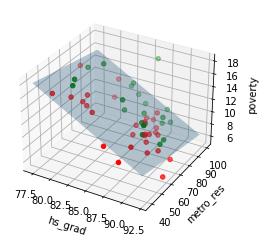

In [1]:
import statsmodels.formula.api as smf
import pandas as pd
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np


data = pd.read_csv('states.csv')

data.head()

import statsmodels.formula.api as sm
result = sm.ols(formula="poverty ~ metro_res + white + hs_grad + female_house", data=data).fit()
print(result.summary())


lm = smf.ols(formula='poverty ~ metro_res + hs_grad', data=data).fit()

lm.params

def f(x, y):
    return lm.params.Intercept + lm.params.hs_grad * x  + lm.params.metro_res * y

x = data.hs_grad.sort_values()
y = data.metro_res.sort_values()

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.3)
data_below_serf = data[data['poverty'] < f(data['hs_grad'], data['metro_res'])]
data_above_serf = data[data['poverty'] >= f(data['hs_grad'], data['metro_res'])]
ax.scatter(data_below_serf.hs_grad, data_below_serf.metro_res, data_below_serf.poverty, c='r', marker='o')
ax.scatter(data_above_serf.hs_grad, data_above_serf.metro_res, data_above_serf.poverty, c='g', marker='o')
ax.set_xlabel('hs_grad')
ax.set_ylabel('metro_res')
ax.set_zlabel('poverty')


plt.show()